In [180]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup
from IPython.display import display
import matplotlib.pyplot as plt 
import numpy as np

tokens = ['loopring', 'xrp', 'cardano', 'stellar', 'dogecoin', 'polygon', 'algorand', 'decentraland',
          'tron', 'curve-dao-token', 'the-graph', 'tezos', 'celo', 'amp', 'iota', 'eos', 'nucypher',
          'basic-attention-token', 'synthetix-network-token', 'nem', 'icon', 'qtum', '0x', 'bancor-network',
          'skale', 'siacoin', 'storj', 'band-protocol', 'ren', 'civic', 'nano', 'aragon', 'orchid-protocol',
          'lisk', 'iexec-rlc', 'nkn', 'kyber-network-crystal', 'district0x', 'fantom', 'the-sandbox',
          'terra-luna', 'solana', 'cosmos', 'polkadot', 'near', 'avalanche',
          'uniswap', 'sushi', 'chainlink', 'aave', 'arweave', 'filecoin', 'helium', 'thorchain']

circ_supply = []
max_supply = []
price = []
df_list = [tokens, price, circ_supply]

for each in tokens:
    url = "https://www.coingecko.com/en/coins/{}".format(each)
    r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(r.text, 'lxml')
    for each_price in soup.find('span', class_="no-wrap"):
        each_price = each_price.strip('$')
        each_price = each_price.replace(',', '')
        each_price = float(each_price)
        price.append(each_price)
    for each_circ_supply in soup.find('span', class_="tw-text-gray-900 dark:tw-text-white tw-float-right tw-font-medium tw-mr-1"):
        each_circ_supply = each_circ_supply.strip('\n')
        each_circ_supply = each_circ_supply.replace(',', '')
        each_circ_supply = int(each_circ_supply)
        circ_supply.append(each_circ_supply)
        
df_columns = ['Token', 'Price', 'Circulating Supply']
df = pd.DataFrame(df_list)
df = df.transpose()
df.columns = df_columns
display(df)

,Token,Price,Circulating Supply
0,loopring,0.754839,1245991468
1,xrp,0.730298,47949281138
2,cardano,0.864784,32066390668
3,stellar,0.18721,24943914957
4,dogecoin,0.125667,132670764299
5,polygon,1.47,6872890164
6,algorand,0.828867,6618939297
7,decentraland,2.57,1496082211
8,tron,0.059134,101747699808
9,curve-dao-token,2.3,391958099


In [ ]:
#Linear Regression Study

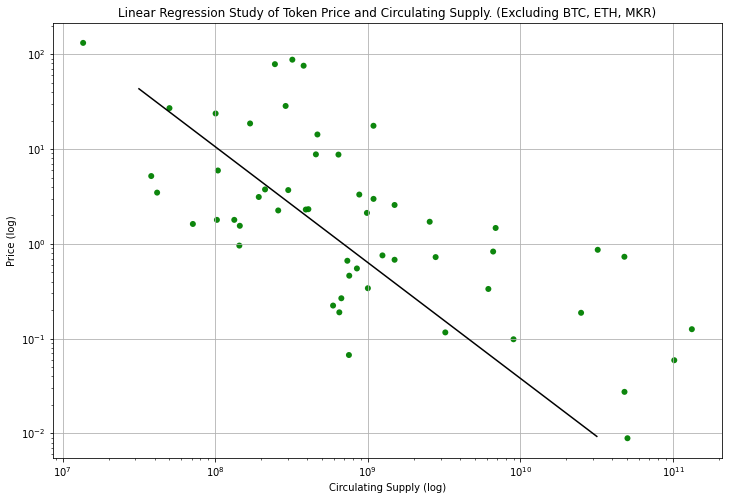

In [186]:
from scipy.optimize import curve_fit


fig = plt.figure(figsize=(12,8))
ax=plt.gca() 
ax.scatter(circ_supply,price,c="green",alpha=0.95,edgecolors='none', label='data')
ax.set_yscale('log')
ax.set_xscale('log')


newX = np.logspace(10.5, 7.5)  

def ExpFunc(circ_supply, a, b):
    return a * np.power(circ_supply, b)

popt, pcov = curve_fit(ExpFunc, circ_supply, price)
plt.plot(newX, ExpFunc(newX, *popt), 'k-')


ax.grid(b='on')
plt.xlabel('Circulating Supply (log)')
plt.ylabel('Price (log)')
plt.title('Linear Regression Study of Token Price and Circulating Supply. (Excluding BTC, ETH, MKR)')
plt.show()